# Coursera Courses Dataset Analysis

## Introduction

This is an EDA done for Coursera's Dataset that lists different course offerings, affiliated organizations, ratings, difficulty levels and enrollment numbers.

Enrollment is identified as a key factor in thid analysis and a lot the analysis is to try and find out how the different pieces of information relate to enrollment and see if we can understand best what could be done to better it and improve the whole metric if needed. 

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Loading Dataset


In [42]:
df = pd.read_csv("coursea_data.csv")
df.head(5)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


## Data Cleaning

In [43]:
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

In [44]:
# Convert 'course_students_enrolled' to numeric by handling 'k' and 'm' suffixes
df["course_students_enrolled"] = (
    df["course_students_enrolled"]
    .replace({"k": "e3", "m": "e6"}, regex=True)
    .astype(float)
)
df.head(5)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300.0
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000.0
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000.0
3,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000.0
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000.0


## Explorative Data Analysis

### 1. Distribution of Course Ratings

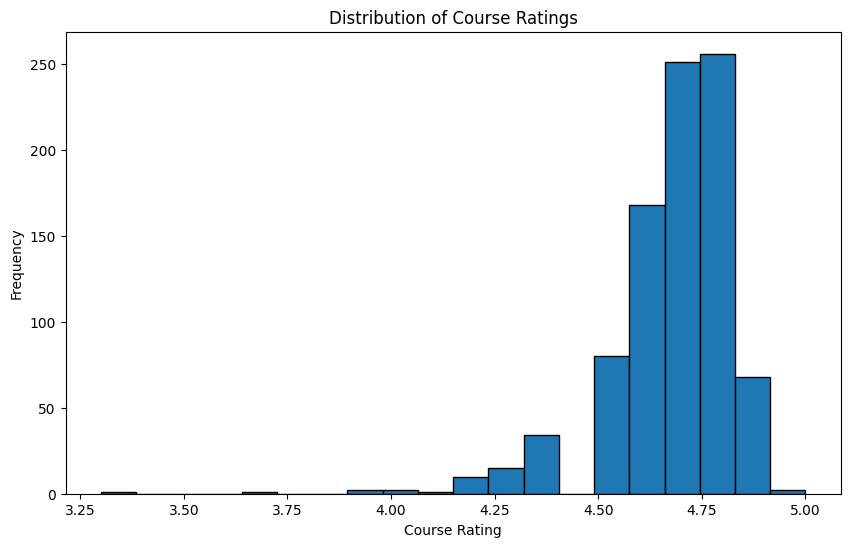

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(df["course_rating"], bins=20, edgecolor="black")
plt.xlabel("Course Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Course Ratings")
plt.show()
# scale

The histogram suggests that the majority of courses have high ratings (around 4.5 to 5.0), indicating a generally positive assessment by users.

The distribution is right-skewed, as there are fewer courses with ratings below 4.5.

This visualization can help understand the rating tendencies of courses in the dataset, highlighting that most are well-rated, which might suggest good quality or user satisfaction.

### 2. Course Difficulty Analysis

#### Enrollmennts per Difficulty Level


In [46]:
enrollments_by_difficulty = (
    df.groupby("course_difficulty")["course_students_enrolled"].sum().reset_index()
)
enrollments_by_difficulty["course_students_enrolled"] = (
    enrollments_by_difficulty["course_students_enrolled"] / 1e6
).round(2)

color_mapping = {
    "Beginner": "#1f77b4",
    "Intermediate": "#2ca02c",
    "Mixed": "#ff7f0e",
    "Advanced": "#d62728",
}

fig = px.bar(
    enrollments_by_difficulty,
    x="course_difficulty",
    y="course_students_enrolled",
    color="course_difficulty",
    color_discrete_map=color_mapping,
    category_orders={
        "course_difficulty": ["Beginner", "Intermediate", "Mixed", "Advanced"]
    },
    labels={
        "course_difficulty": "Course Difficulty",
        "course_students_enrolled": "Total Students Enrolled",
    },
    title="Total Students Enrolled per Course Difficulty",
    text_auto=True,
)

fig.update_layout(
    title_x=0.5,
    plot_bgcolor="white",
    showlegend=False,
    yaxis=dict(showgrid=False, visible=False),
)

fig.update_traces(hovertemplate=None, hoverinfo="skip", texttemplate="%{y}M Students")
fig.show()

Courses are split through 4 different difficulty levels and we can notice that most student tend to enroll in beginner courses most likely as a way to gain foundational knowlegde of given courses. 

We also notice a preference in Mixed difficulty courses as many students opt to have some extra knowlegde above beginner level to facilitate career growth or proficient execution of knowledge there within. 

Intermediate courses aren't as preffered and Advanced courses fall way short in enrollments compared to courses in the other levels.

#### Distribution of Courses in Difficulty Levels

In [47]:
difficulty_counts = df["course_difficulty"].value_counts().reset_index()
difficulty_counts.columns = ["course_difficulty", "count"]

fig = px.bar(
    difficulty_counts,
    x="course_difficulty",
    y="count",
    color="course_difficulty",
    color_discrete_map=color_mapping,
    hover_data={},
    category_orders={
        "course_difficulty": ["Beginner", "Intermediate", "Mixed", "Advanced"]
    },
    labels={"course_difficulty": "Course Difficulty", "count": "Number of Courses"},
    title="Distribution of Courses in Difficulty Levels",
    text_auto=True,
)

fig.update_layout(
    title_x=0.5,
    plot_bgcolor="white",
    showlegend=False,
    yaxis=dict(showgrid=False, visible=False),
)
fig.update_traces(hovertemplate=None, hoverinfo="skip", texttemplate="%{y} Courses")
fig.show()

More than half of Coursera's course offerings are beginner courses and the number of courses available reduces as you move up in the levels. So they could opt to introduce more courses in the levels above beginner and maybe in turn that may drive up enrollments in those difficulty levels.

#### Average Rating per Difficulty Level

In [48]:
average_rating_by_difficulty = df.groupby("course_difficulty")["course_rating"].mean()

fig = px.bar(
    average_rating_by_difficulty.reset_index(),
    x="course_difficulty",
    y="course_rating",
    color="course_difficulty",
    color_discrete_map=color_mapping,
    hover_data={"course_difficulty": False, "course_rating": False},
    category_orders={
        "course_difficulty": ["Beginner", "Intermediate", "Mixed", "Advanced"]
    },
    labels={
        "course_difficulty": "Course Difficulty",
        "course_rating": "Average Rating",
    },
    title="Average Rating per Course Difficulty Level",
    text_auto=True,
)

fig.update_layout(
    title_x=0.5,
    plot_bgcolor="white",
    showlegend=False,
    yaxis=dict(showgrid=False, visible=False),
)
fig.update_traces(texttemplate="%{y:.1f}", hoverinfo="skip", hovertemplate=None)
fig.show()

We can see that the course difficulty levels are all well rated and closely rated showing a standardized approach to course structures which is good practice.


### 3. Organizations Analysis

#### Organizations by enrollment 

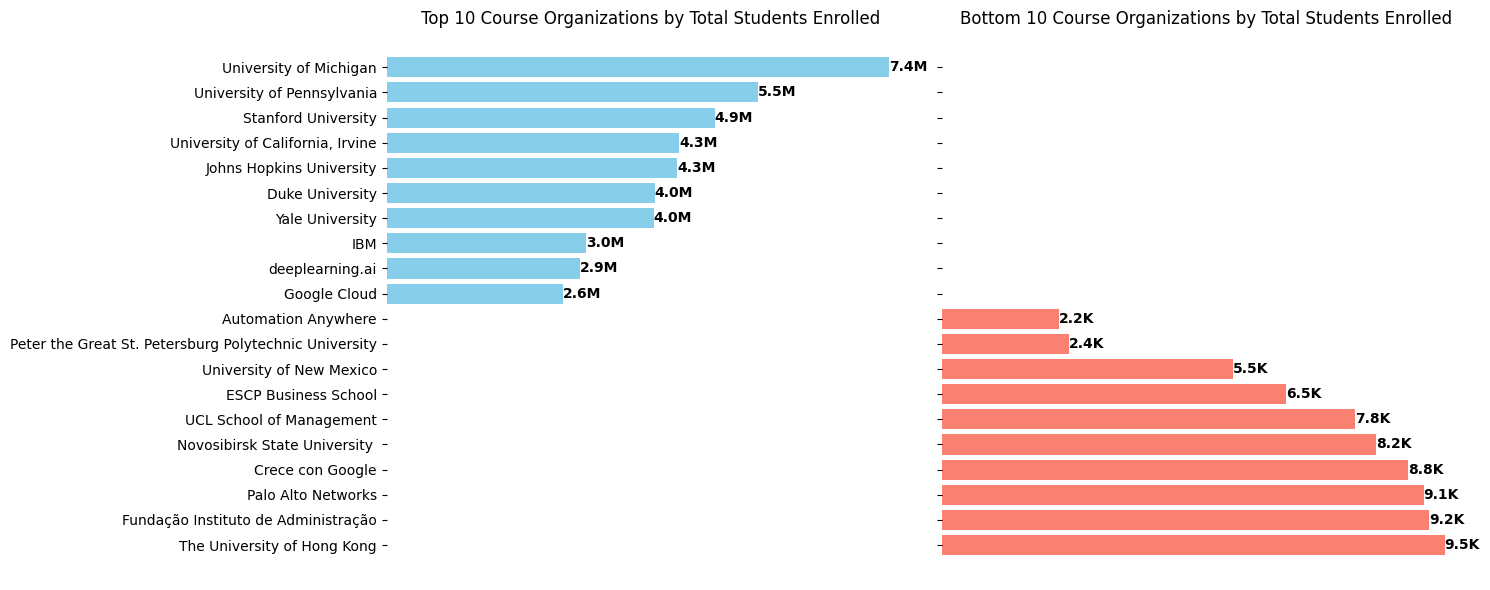

In [49]:
top_org = (
    df.groupby("course_organization")["course_students_enrolled"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

bottom_org = (
    df.groupby("course_organization")["course_students_enrolled"]
    .sum()
    .sort_values(ascending=True)
    .head(10)
)

fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# top 10

bars_top = axes[0].barh(top_org.index, top_org.values, color="skyblue", edgecolor=None)
axes[0].invert_yaxis()
axes[0].set_title("Top 10 Course Organizations by Total Students Enrolled")
axes[0].set_xlabel("Students Enrolled")
for bar in bars_top:
    xval = bar.get_width()
    if xval >= 1e6:
        label = f"{xval / 1e6:.1f}M"
    elif xval >= 1e3:
        label = f"{xval / 1e3:.1f}K"
    else:
        label = f"{int(xval)}"
    axes[0].text(
        xval,
        bar.get_y() + bar.get_height() / 2,
        label,
        ha="left",
        va="center",
        fontweight="bold",
    )
axes[0].xaxis.set_visible(False)
for spine in axes[0].spines.values():
    spine.set_visible(False)

# bottom 10

bars_bottom = axes[1].barh(bottom_org.index, bottom_org.values, color="salmon", edgecolor=None)
axes[1].set_title("Bottom 10 Course Organizations by Total Students Enrolled")
axes[1].set_xlabel("Students Enrolled")
for bar in bars_bottom:
    xval = bar.get_width()
    if xval >= 1e6:
        label = f"{xval / 1e6:.1f}M"
    elif xval >= 1e3:
        label = f"{xval / 1e3:.1f}K"
    else:
        label = f"{int(xval)}"
    axes[1].text(
        xval,
        bar.get_y() + bar.get_height() / 2,
        label,
        ha="left",
        va="center",
        fontweight="bold",
    )
axes[1].xaxis.set_visible(False)
for spine in axes[1].spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()

When we compare the top 10 organizations by student enrollments to the bottom 10, we see such a high discrepancy. We can notice that top organizations get millions of enrollments as compared to bottom organizatiojns that don't really even make 10k enrollments. 

Various factors such as; notriety of the university, popularity of the courses offered by the organizations among others could be responsible for this.

#### Top 10 Organizations with most courses

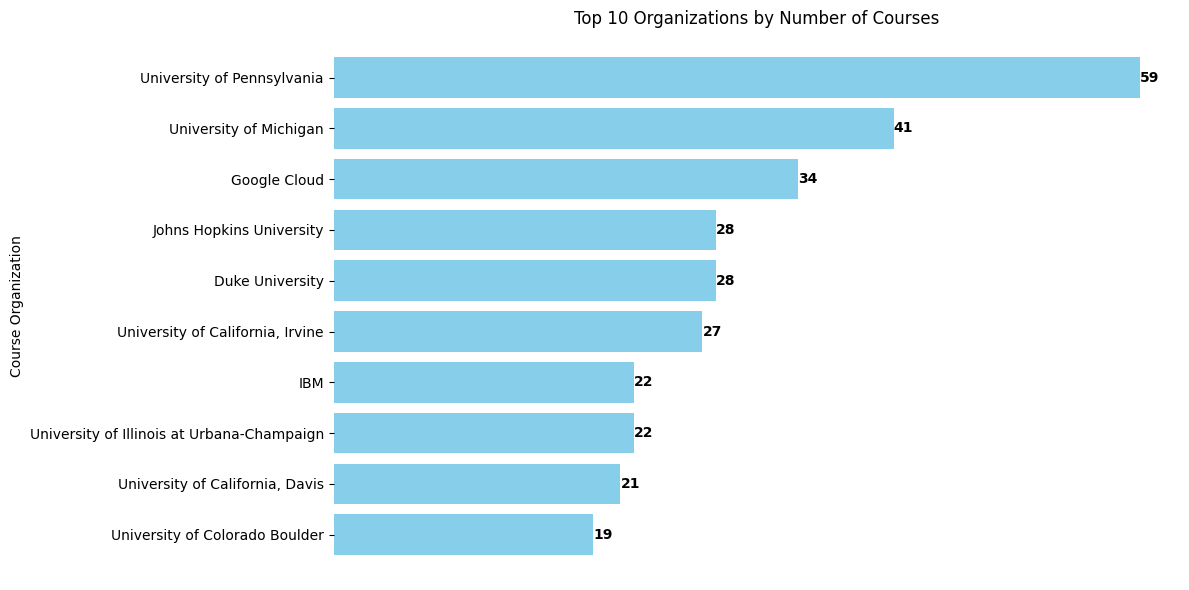

In [50]:
top10_org_courses = df["course_organization"].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
bars = plt.barh(
    top10_org_courses.index, top10_org_courses.values, color="skyblue", edgecolor=None
)

for bar in bars:
    xval = bar.get_width()
    plt.text(
        xval,
        bar.get_y() + bar.get_height() / 2,
        f"{int(xval)}",
        ha="left",
        va="center",
        fontweight="bold",
    )

plt.ylabel("Course Organization")
plt.title("Top 10 Organizations by Number of Courses")
plt.gca().invert_yaxis()
plt.gca().xaxis.set_visible(False)
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

A list of organizations with the most course offerings allows shows us that majority of coursera's offerings are from the university of Pennsylvania which gets the second most enrollments right behind the University of Michigan which happens to have the second most courses. All the organizations at the bottom of the courses offered list offer one course.

#### Average Rating by Organization (Top 10 organizations with most courses)

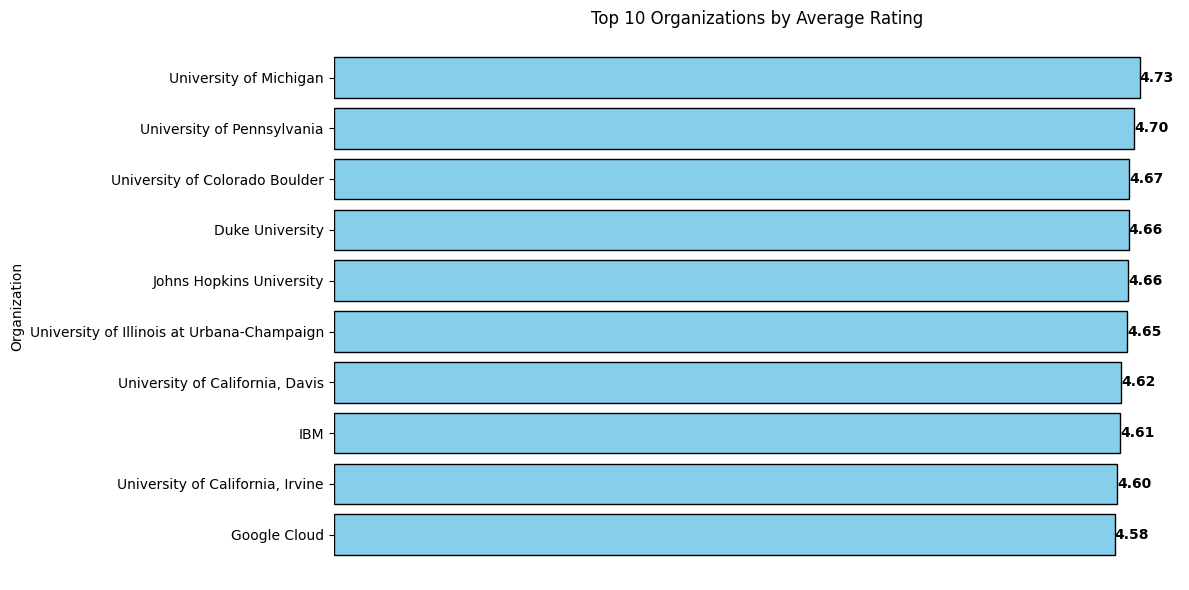

In [51]:
top10_org_courses = df["course_organization"].value_counts().nlargest(10).index
top10_org_avg_rating = df[df["course_organization"].isin(top10_org_courses)]
top10_org_avg_rating = (
    top10_org_avg_rating.groupby("course_organization")["course_rating"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12, 6))
bars = plt.barh(
    top10_org_avg_rating.index,
    top10_org_avg_rating.values,
    color="skyblue",
    edgecolor="black",
)

for bar in bars:
    xval = bar.get_width()
    plt.text(
        xval,
        bar.get_y() + bar.get_height() / 2,
        f"{xval:.2f}",
        va="center",
        ha="left",
        fontweight="bold",
    )

plt.ylabel("Organization")
plt.gca().invert_yaxis()
plt.gca().xaxis.set_visible(False)
plt.title("Top 10 Organizations by Average Rating")
plt.tight_layout()
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()

After investigating the average ratings of the different courses offered by different universiteis in the top 10 of total courses offered, we can see that University of Michigan has the most highly rated courses on average and google cloud comes in at 10 granted a rating of 4.58 isn't bad at all but it helps to show how the different "power organizations rank up against each other. 

It should be noted that the nuisances that go into the ratings arent clarified so we can't conclusively say what factors make some ratings better than others 

### 4. Top-Rated Courses Analysis

#### Top Highly-Rated Courses by ratings

In [52]:
top_courses = df[df["course_rating"] >= 4.9]
top_courses = top_courses.sort_values(by="course_rating", ascending=False).head(20)

top_courses_display = top_courses.rename(
    columns={
        "course_title": "Course Title",
        "course_organization": "Organization",
        "course_rating": "Rating",
        "course_students_enrolled": "Enrollments",
    }
)

print("Top-Rated Courses (4.9+):")
display(top_courses_display[["Course Title", "Organization", "Rating", "Enrollments"]])

Top-Rated Courses (4.9+):


,Course Title,Organization,Rating,Enrollments
251,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,5.0,1500.0
432,Infectious Disease Modelling,Imperial College London,5.0,1600.0
626,Neural Networks and Deep Learning,deeplearning.ai,4.9,630000.0
705,Roman Architecture,Yale University,4.9,30000.0
703,Revisão Sistemática e Meta-análise,Universidade Estadual de Campinas,4.9,17000.0
702,Rethinking International Tax Law,Universiteit Leiden,4.9,36000.0
690,Queering Identities: LGBTQ+ Sexuality and Gend...,University of Colorado System,4.9,3000.0
684,Python Data Structures,University of Michigan,4.9,420000.0
651,Periodismo digital y combate a las fake news,Universidad Nacional Autónoma de México,4.9,8900.0
618,Music Business Foundations,Berklee College of Music,4.9,34000.0


#### Top Courses by enrollment

In [53]:
top_enrolled_courses = df.sort_values(
    by="course_students_enrolled", ascending=False
).head(10)
fig = px.bar(
    top_enrolled_courses,
    x="course_students_enrolled",
    y="course_title",
    hover_data={"course_rating": True, "course_title": False},
    labels={
        "course_students_enrolled": "Enrollments",
        "course_title": "Course Title",
        "course_rating": "Rating",
    },
    title="Top 10 Most Enrolled Courses and Ratings",
    width=1100,
    height=600,
)

fig.update_layout(
    title_x=0.5, plot_bgcolor="white", xaxis=dict(showgrid=False, visible=False)
)
fig.update_traces(marker_color="#1f77b4")
fig.show()

The most enrolled in course is Machine Learning from Stanford University that gets a total of 3.2 million enrollments and has a rating of 4.9 . Important to note that Stanford University doesn't crack the top 10 list of organizations with most courses offered, Quality over Quantity one would say. They do however come in 3rd place in the top 10 of total enrollments, which further illustrates the pull the organization may have among other factors.  

### 5. Course Certificate Types Analysis

#### Distribution of Course Certificate Types

In [54]:
course_cert_types = df["course_Certificate_type"].value_counts().reset_index()
course_cert_types.columns = ["Certificate Type", "Number of Courses"]

fig = px.bar(
    course_cert_types,
    x="Certificate Type",
    y="Number of Courses",
    color="Certificate Type",  # Different color for each type
    labels={"Number of Courses": "Number of Courses"},
    title="Distribution of Certificate Types",
    height=600,
    width=1000,
    text_auto=True,
)

fig.update_layout(
    title_x=0.5,
    plot_bgcolor="white",
    xaxis=dict(showline=False, showgrid=False, zeroline=False),
    yaxis=dict(
        showline=False, showgrid=False, zeroline=False, visible=False
    ),  # Remove y-axis lines
    showlegend=False,
)
fig.update_traces(hovertemplate=None, hoverinfo="skip", texttemplate="%{y} Courses")

fig.show()

There are only 3 certificate types one can get from Coursera; Course Certificate, Specialization Certificate and Professional Certificate. Most Courses grant you Course certificates and Specialization Certificates come in second and falling far behind is the Professional Certificate which has only 12 courses. 

Maybe introducing more courses for professional certificates would increase enrollments and overall notriety. 

#### Popularity of Course Certificates

In [55]:
popular_certificates = (
    df.groupby("course_Certificate_type")["course_students_enrolled"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
popular_certificates.columns = ["Certificate Type", "Total Enrollments"]
popular_certificates["Total Enrollments"] = (
    popular_certificates["Total Enrollments"] / 1e6
).round(2)

fig = px.bar(
    popular_certificates,
    x="Certificate Type",
    y="Total Enrollments",
    color="Certificate Type",
    title="Popular Certificates by Enrollments",
    labels={"Total Enrollments": "Total Enrollments"},
    height=600,
    width=1000,
    text_auto=True,
)
fig.update_layout(
    title_x=0.5,
    plot_bgcolor="white",
    xaxis=dict(showline=False, showgrid=False, zeroline=False),
    yaxis=dict(showline=False, showgrid=False, zeroline=False, visible=False),
    showlegend=False,
)
fig.update_traces(
    texttemplate="%{y}M Enrollments", hovertemplate=None, hoverinfo="skip"
)
fig.show()

Course certificates get the most enrollments but this could in turn be fueled by the prevalence of many course options. We notice that even though Specialization and Professional certificates don't get as many enrollments in total on average they get more enrollments, as they average out to 91.7k enrollments per course for Specialization and 190.8k enrollments per course for Professional Ceriticates. 

This reiterates my previous recommendation that more professional courses selection would facilitate enrollments. 

#### Rating Distribution by Certificates Type

<Figure size 1000x600 with 0 Axes>

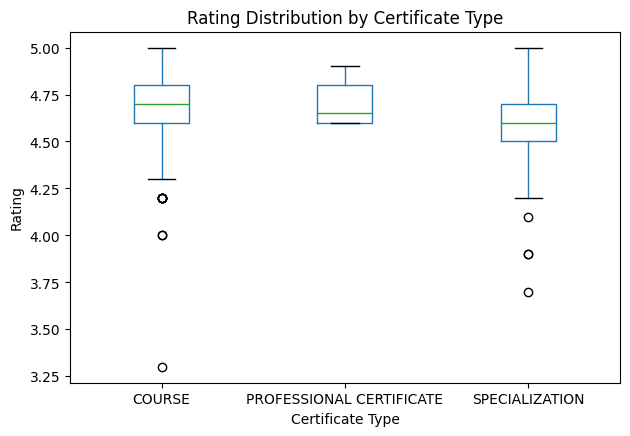

In [56]:
plt.figure(figsize=(10, 6))
df.boxplot(column="course_rating", by="course_Certificate_type", grid=False)
plt.xlabel("Certificate Type")
plt.ylabel("Rating")
plt.title("Rating Distribution by Certificate Type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.suptitle("")
plt.show()

The median rating for "COURSE" and "PROFESSIONAL CERTIFICATE" is higher than for "SPECIALIZATION," indicating that they generally receive higher ratings.

"COURSE" and "PROFESSIONAL CERTIFICATE" have slightly narrower IQRs, meaning their ratings are more concentrated around the median, while "SPECIALIZATION" has a wider range of ratings, suggesting more variability in the ratings.

Outliers indicate that there are some courses within each certificate type that received significantly lower ratings than the typical range.

We get a quick comparison of the rating distributions across different certificate types, showing that "COURSE" and "PROFESSIONAL CERTIFICATE" tend to have higher ratings with less variability compared to "SPECIALIZATION."

### 6. Correlation between Ratings and Enrollments

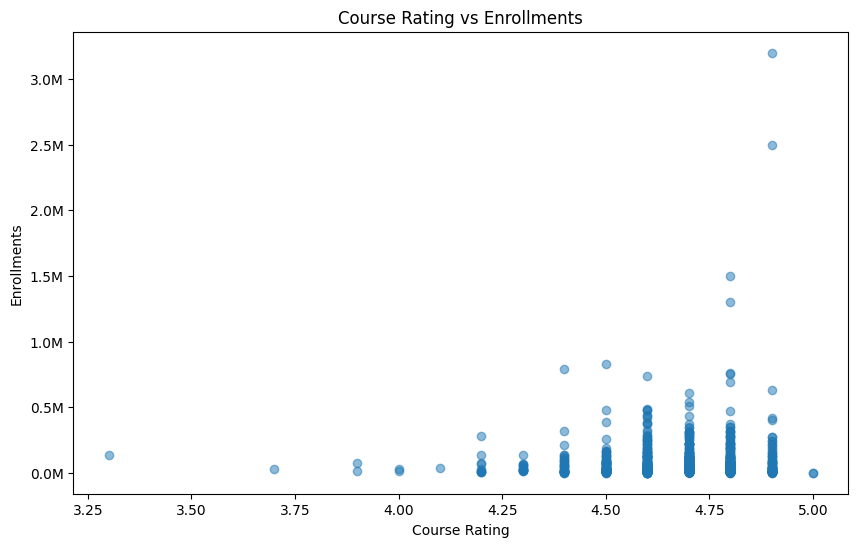

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(df["course_rating"], df["course_students_enrolled"], alpha=0.5)
plt.xlabel("Course Rating")
plt.ylabel("Enrollments")
plt.title("Course Rating vs Enrollments")
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
plt.show()
# fix scale 

There is a general trend where courses with higher ratings (around 4.5 and above) tend to have more enrollments, though this is not a strict rule.

A few courses with very high enrollments have ratings around 4.5 to 5.0, indicating that popular courses generally receive positive ratings.
However, courses with ratings between 4.0 and 4.5 also have varied enrollment numbers, suggesting that other factors beyond rating may influence enrollment.

Courses with lower ratings (below 4.0) tend to have lower enrollments, though they are few in this dataset.

We get insight into the relationship between a course’s rating and its popularity (enrollment count), showing that while highly-rated courses often attract more students, there is still considerable variation in enrollments across similar ratings.

#### Correlation Matrix

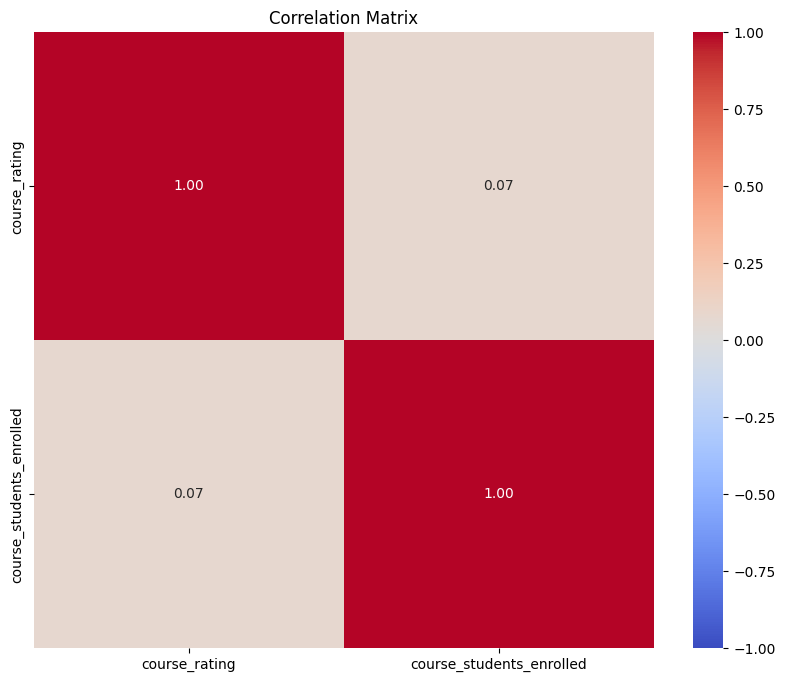

In [58]:
numeric_cols = df.select_dtypes(include=["int", "float"]).columns

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

The weak positive correlation coefficient (approximately 0.07) between course_rating and course_students_enrolled suggests that there is almost no linear relationship between the course rating and the number of students enrolled. Here’s a more detailed interpretation of what this means:

- Minimal Influence: Since the correlation is close to zero, it indicates that high ratings don't necessarily attract significantly more enrollments, nor do low ratings deter enrollments in a measurable way. In other words, highly rated courses may have as few or as many students as lower-rated ones.

- Other Influential Factors: This weak correlation suggests that factors other than the course rating might play a more significant role in driving enrollments. For example:
    Course Content and Topic: Some topics might naturally attract more students due to demand or market trends, regardless of the course's rating.
    Marketing and Visibility: Courses promoted heavily on platforms or by popular instructors may attract more students, regardless of ratings.
    Certificate or Career Benefits: Courses that lead to professional certificates or are perceived to have high career value may see higher enrollments.

- Non-Linear Relationship Potential: This correlation value specifically measures the linear relationship between ratings and enrollments. It's possible there may be a non-linear relationship, where ratings only impact enrollments at extreme values. For example, courses with extremely high ratings (4.9-5) might attract more enrollments, but this effect might not be consistent across the whole range of ratings.

- Platform Dynamics: Some platforms have courses with built-in popularity due to early launch dates, partnerships, or featured status. This popularity can lead to high enrollments even if the rating is moderate.

In summary, the weak correlation indicates that rating alone is not a strong predictor of enrollment numbers for these courses. It suggests that other factors are likely at play in driving student enrollments, and further analysis could investigate these additional variables to identify stronger influences.

# Summary

## Overall Insights

The analysis provides valuable insights into Coursera’s course offerings:

- Popularity vs. Quality: Popular courses are not always the highest-rated, and high-rated courses are not necessarily the most enrolled, suggesting a complex relationship between course appeal and learner engagement.

- Diverse Offerings for Different Skill Levels: The prevalence of beginner-level courses reflects Coursera’s role in providing accessible education. However, there is also a variety of content for advanced learners, though with lower enrollments.

- Certificate Types and Learner Preferences: The popularity of individual courses over specializations and certificates may indicate a preference for shorter, more focused learning experiences, especially among those exploring new fields.


## Recomendations

- Personalized Learning Paths: Coursera could enhance engagement by recommending learning paths that combine popular beginner courses with intermediate and advanced content, creating a more structured progression for users.

- Focus on Emerging Topics: Observing the popularity of tech and business courses, Coursera may benefit from further expanding offerings in these high-demand areas while maintaining quality to attract and retain learners.

- Targeted Marketing for High-Rated Courses: Since highly-rated courses don’t always have high enrollments, targeted marketing or promotion could help align course visibility with learner interest in quality content.